In [1]:
import igraph as ig
import seaborn as sns
import math
import numpy as np
from copy import deepcopy
from tqdm import tqdm

In [2]:
# Initialize constants
N = 625 # Number of nodes, usually a square number
epsilon = 0.04 # Standard deviation of opinions required to terminate
trials = 1000 # Number of trials to calculate convergence time

In [3]:
# Library config
ig.config['plotting.backend'] = 'matplotlib'

## Line graph

This graph consists of $N$ nodes in a line, where each node is connected to its two neighbors.

<AxesSubplot: >

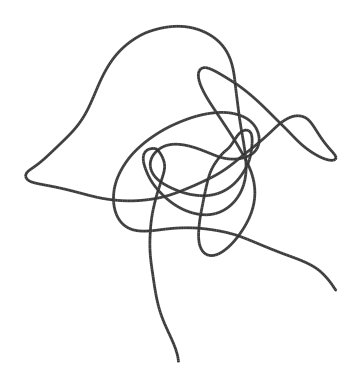

In [4]:
g_line = ig.Graph.Ring(n=N, circular=False)
ig.plot(g_line)

## Ring graph

This graph consists of $N$ nodes arranged in a ring, where each node is connected with its two neighbors.

<AxesSubplot: >

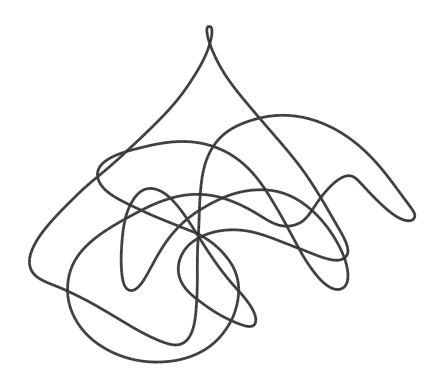

In [5]:
g_ring = ig.Graph.Ring(n=N, circular=True)
ig.plot(g_ring)

## Lattice graph

This consists of $N^2$ nodes arranged in a square lattice, where each node is connected to its four directly adjacent neighbors.

<AxesSubplot: >

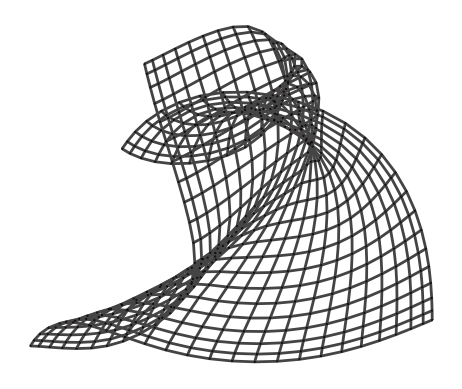

In [6]:
g_lattice = ig.Graph.Lattice(dim=[int(math.sqrt(N)), int(math.sqrt(N))], circular=False)
ig.plot(g_lattice)

## Star graph

The star graph consists of $N$ nodes, $N-1$ of which are connected to a single central node.

<AxesSubplot: >

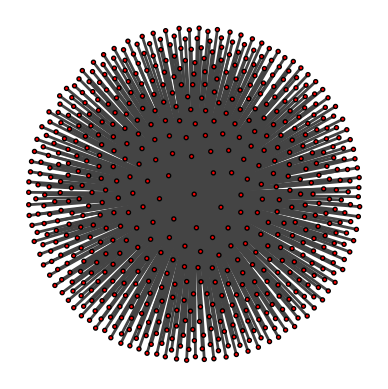

In [7]:
g_star = ig.Graph.Star(N)
ig.plot(g_star)

## Complete graph

The complete graph consists of $N$ nodes, all of which are connected to each other by $O(N^2)$ links. *[The graph is not plotted due to time constraints.]*

In [8]:
g_complete = ig.Graph.Full(N)

## Barabási-Albert (BA) model

The Barabási-Albert model is a method for generating scale-free and connected graphs, adding new nodes and linking them to nodes with a probability proportional to their degree.

<AxesSubplot: >

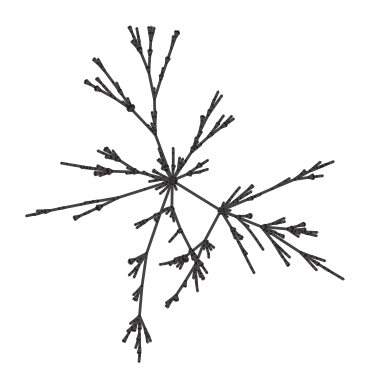

In [9]:
g_ba = ig.Graph.Barabasi(n=N, m=1)
ig.plot(g_ba)

## Watts-Strogatz (WS) model

<AxesSubplot: >

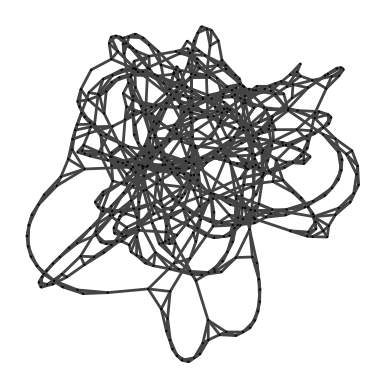

In [10]:
g_ws = ig.Graph.Watts_Strogatz(dim=1, size=625, nei=2, p=0.05)
ig.plot(g_ws)

# Developing the consensus algorithm

In [11]:
def time_to_convergence(g_, epsilon=epsilon):
    # g = deepcopy(g_)

    adj = np.array(g_.get_adjacency().data)
    np.fill_diagonal(adj, 1)
    adj = adj / np.linalg.norm(adj, axis=1, ord=1).reshape((N,1))
    
    # assign random initial preferences on [0,1)
    opinions = np.random.rand(N)

    t = 0
    while(np.std(opinions) > epsilon):
        opinions = np.dot(adj, opinions) # matrix multiplication of modified normalized adjacency matrix with opinion vector
        t += 1
    
    return t

### Calculating time-to-consensus (TTC) values

In [26]:
t_line = [time_to_convergence(g_line) for _ in tqdm(range(trials))]

100%|██████████| 1000/1000 [01:15<00:00, 13.19it/s]


In [13]:
t_ring = [time_to_convergence(g_ring) for _ in tqdm(range(trials))]

100%|██████████| 1000/1000 [00:50<00:00, 19.69it/s]


In [14]:
t_lattice = [time_to_convergence(g_lattice) for _ in tqdm(range(trials))]

100%|██████████| 1000/1000 [00:33<00:00, 29.65it/s]


In [15]:
t_star = [time_to_convergence(g_star) for _ in tqdm(range(trials))]

100%|██████████| 1000/1000 [00:32<00:00, 30.61it/s]


In [16]:
t_complete = [time_to_convergence(g_complete) for _ in tqdm(range(trials))]

100%|██████████| 1000/1000 [00:34<00:00, 28.93it/s]


In [17]:
t_ba = [time_to_convergence(g_ba) for _ in tqdm(range(trials))]

100%|██████████| 1000/1000 [00:37<00:00, 26.63it/s]


In [18]:
t_ws = [time_to_convergence(g_ws) for _ in tqdm(range(trials))]

100%|██████████| 1000/1000 [00:37<00:00, 26.85it/s]


### Histograms of TTC

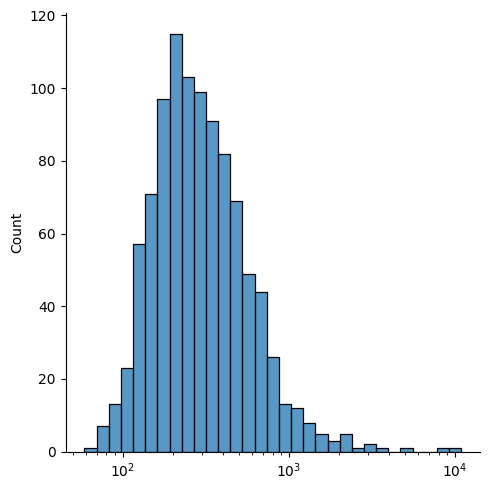

In [19]:
sns.displot(t_line, log_scale=True)

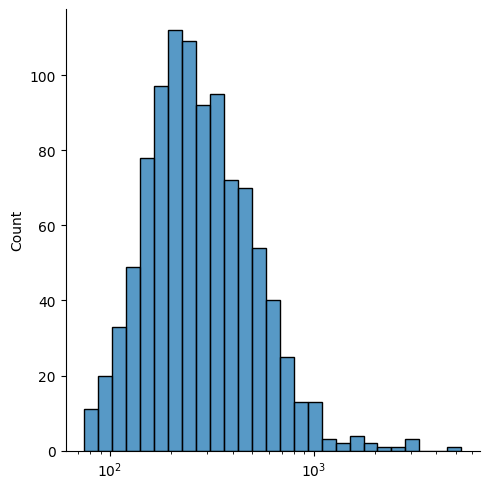

In [20]:
sns.displot(t_ring, log_scale=True)

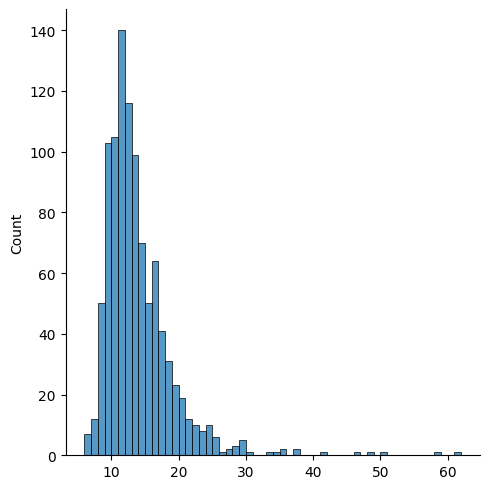

In [21]:
sns.displot(t_lattice)

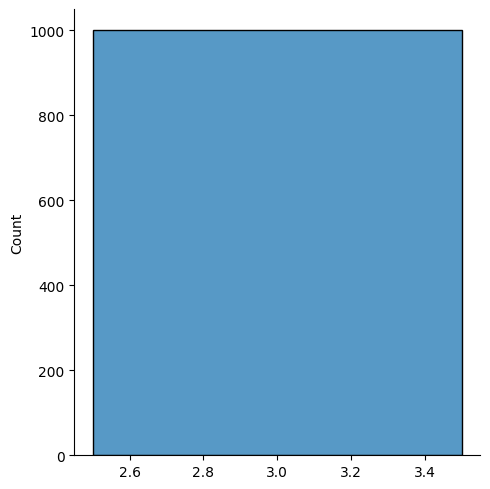

In [22]:
sns.displot(t_star)

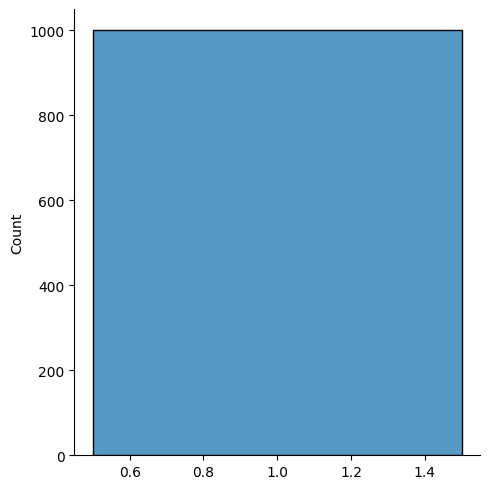

In [23]:
sns.displot(t_complete)

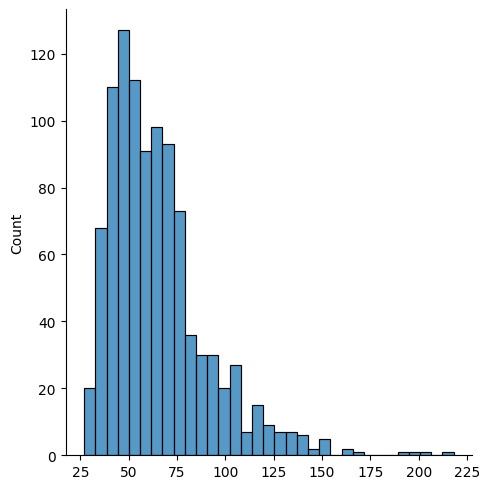

In [24]:
sns.displot(t_ba)

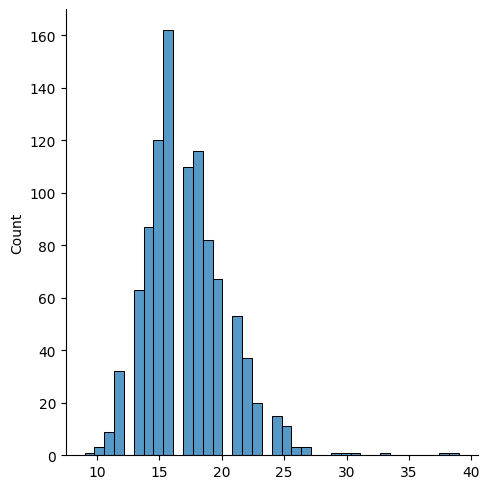

In [25]:
sns.displot(t_ws)